In [1]:
import audb
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
def vis_hist(df, x='emotion', hue=None, hue_order=None, title=None):
    fig = plt.figure(figsize=(24,8))
    ax = fig.add_subplot(111)
    sns.histplot(data=df, x=x, hue=hue, ax=ax, multiple='dodge', hue_order=hue_order, shrink=.8)
    if title is not None:
        ax.set_title(title)
    if hue is not None:
        move_legend(ax, "center left", bbox_to_anchor=(1., 0.5), ncol=3, title_fontsize=14)
    plt.tight_layout()

def distribute_speakers_train_dev_test(speaker_df, meta_dimensions, train_portion, dev_portion):
    """
        For each speaker group (grouped by meta_dimensions), compute the number of speakers that 
        should be assigned to train/dev/test based on the given portions, and then assign that number of speakers
        to the respective splits.
    """
    speakers_splits = [[],[],[]]
    speaker_df = speaker_df.reset_index()
    grouped_df = speaker_df.groupby(by=meta_dimensions)
    for group_name, group_df in grouped_df:
        # first define the number of speakers for train using the portion of speakers to be assigned to train
        group_train_speakers = round(train_portion * len(group_df))
        # secondly define the number of speakers for dev using the portion of speakers to be assigned to dev
        group_dev_speakers = round(dev_portion * len(group_df))
        # the remaining speakers are assigned to test
        group_test_speakers = len(group_df) - group_train_speakers - group_dev_speakers
        group_speaker_portions = [group_train_speakers, group_dev_speakers, group_test_speakers]
        start_index = 0
        end_index = 0
        for i in range(len(group_speaker_portions)):
            end_index = start_index + group_speaker_portions[i]
            speakers_splits[i] += group_df['index'].to_list()[start_index:end_index]
            start_index = end_index
    return speakers_splits

Get:   crema-d v1.0.5
Cache: /home/audeering.local/aderington/audb/crema-d/1.0.5/fe182b91


,emotion,emotion.intensity,speaker,sex,race,ethnicity,age
file,,,,,,,
/home/audeering.local/aderington/audb/crema-d/1.0.5/fe182b91/1001/1001_IEO_NEU_XX.wav,neutral,unspecified,1001,male,Caucasian,Not Hispanic,51
/home/audeering.local/aderington/audb/crema-d/1.0.5/fe182b91/1001/1001_IEO_HAP_LO.wav,happiness,low,1001,male,Caucasian,Not Hispanic,51
/home/audeering.local/aderington/audb/crema-d/1.0.5/fe182b91/1001/1001_IEO_HAP_MD.wav,happiness,mid,1001,male,Caucasian,Not Hispanic,51
/home/audeering.local/aderington/audb/crema-d/1.0.5/fe182b91/1001/1001_IEO_HAP_HI.wav,happiness,high,1001,male,Caucasian,Not Hispanic,51
/home/audeering.local/aderington/audb/crema-d/1.0.5/fe182b91/1001/1001_IEO_SAD_LO.wav,sadness,low,1001,male,Caucasian,Not Hispanic,51
...,...,...,...,...,...,...,...
/home/audeering.local/aderington/audb/crema-d/1.0.5/fe182b91/1091/1091_WSI_HAP_XX.wav,happiness,unspecified,1091,female,Asian,Not Hispanic,29
/home/audeering.local/aderington/audb/crema-d/1.0.5/fe182b91/1091/1091_WSI_SAD_XX.wav,sadness,unspecified,1091,female,Asian,Not Hispanic,29
/home/audeering.local/aderington/audb/crema-d/1.0.5/fe182b91/1091/1091_WSI_ANG_XX.wav,anger,unspecified,1091,female,Asian,Not Hispanic,29


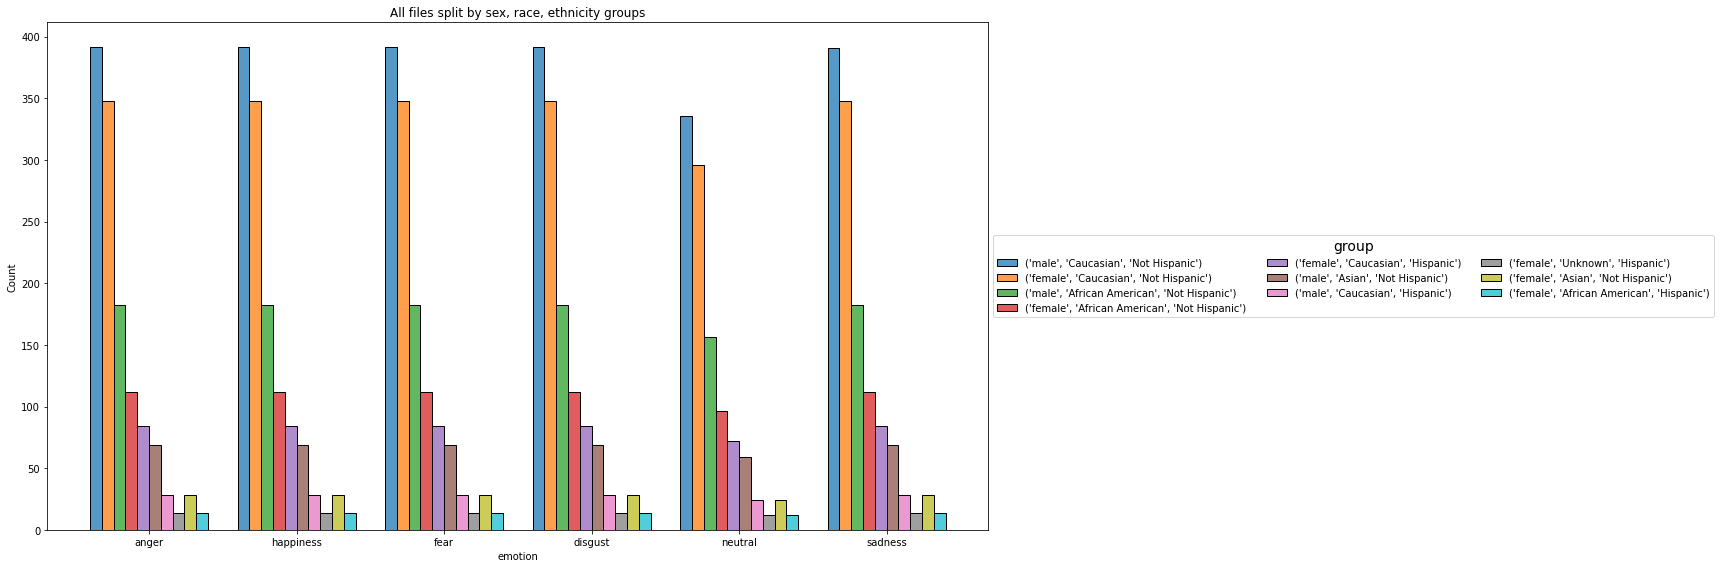

In [2]:
db = audb.load(
    name='crema-d',
    version='1.0.5',
    format='wav',
    sampling_rate=16000,
    mixdown=True,
    only_metadata=True,

)
emotion_df = db.tables['emotion'].get()
meta = db.tables["speaker"].get(index=emotion_df.index)
emotion_df.loc[emotion_df.index, "speaker"] = meta["speaker"]
meta["sex"] = meta["speaker"].apply(lambda x: db.schemes["speaker"].labels[x]["sex"])
meta["race"] = meta["speaker"].apply(lambda x: db.schemes["speaker"].labels[x]["race"])
meta["ethnicity"] = meta["speaker"].apply(lambda x: db.schemes["speaker"].labels[x]["ethnicity"])
meta["age"] = meta["speaker"].apply(lambda x: db.schemes["speaker"].labels[x]["age"])

emotion_df.loc[emotion_df.index, "sex"] = meta["sex"]
emotion_df.loc[emotion_df.index, "race"] = meta["race"]
emotion_df.loc[emotion_df.index, "ethnicity"] = meta["ethnicity"]
emotion_df.loc[emotion_df.index, "age"] = meta["age"]

display(emotion_df)
emotion_df['group'] = emotion_df[['sex', 'race', 'ethnicity']].apply(tuple, axis=1).astype(str)
group_order = list(emotion_df['group'].unique())
vis_hist(emotion_df,x='emotion', hue='group', hue_order=group_order, title='All files split by sex, race, ethnicity groups')


In [3]:
pd.set_option("display.max_rows", 100, "display.max_columns", 10)
speaker_df = pd.DataFrame.from_dict(db.schemes["speaker"].labels, orient='index')
display(speaker_df)
speaker_df['group'] = speaker_df[['sex', 'race', 'ethnicity']].apply(tuple, axis=1).astype(str)


,age,sex,race,ethnicity
1001,51,male,Caucasian,Not Hispanic
1002,21,female,Caucasian,Not Hispanic
1003,21,female,Caucasian,Not Hispanic
1004,42,female,Caucasian,Not Hispanic
1005,29,male,African American,Not Hispanic
1006,58,female,Caucasian,Not Hispanic
1007,38,female,African American,Not Hispanic
1008,46,female,Caucasian,Not Hispanic
1009,24,female,Caucasian,Not Hispanic
1010,27,female,Caucasian,Not Hispanic


In [4]:
speaker_dist = distribute_speakers_train_dev_test(speaker_df, 
                                                  meta_dimensions=['sex', 'race', 'ethnicity'],
                                                  train_portion=0.6,
                                                  dev_portion=0.2)
speaker_split_dict = {
    'train': speaker_dist[0],
    'dev': speaker_dist[1],
    'test': speaker_dist[2]
}
print(speaker_split_dict)
with open('speaker_splits.json', 'w') as fp:
    json.dump(speaker_split_dict, fp)
print(f'train number of speakers: {len(speaker_dist[0])}')
print(f'dev number of speakers: {len(speaker_dist[1])}')      
print(f'test number of speakers: {len(speaker_dist[2])}')      

{'train': [1073, 1007, 1029, 1030, 1056, 1060, 1072, 1013, 1018, 1043, 1046, 1002, 1003, 1004, 1006, 1008, 1009, 1010, 1012, 1020, 1021, 1024, 1025, 1028, 1037, 1052, 1047, 1005, 1015, 1032, 1036, 1038, 1039, 1042, 1050, 1019, 1045, 1081, 1031, 1001, 1011, 1014, 1016, 1017, 1022, 1023, 1026, 1027, 1033, 1034, 1035, 1040, 1041, 1044, 1051, 1057], 'dev': [1061, 1063, 1049, 1053, 1054, 1055, 1058, 1075, 1059, 1070, 1080, 1085, 1062, 1064, 1065, 1066, 1067, 1068], 'test': [1074, 1091, 1079, 1076, 1078, 1082, 1084, 1089, 1083, 1088, 1090, 1048, 1069, 1071, 1077, 1086, 1087]}
train number of speakers: 56
dev number of speakers: 18
test number of speakers: 17


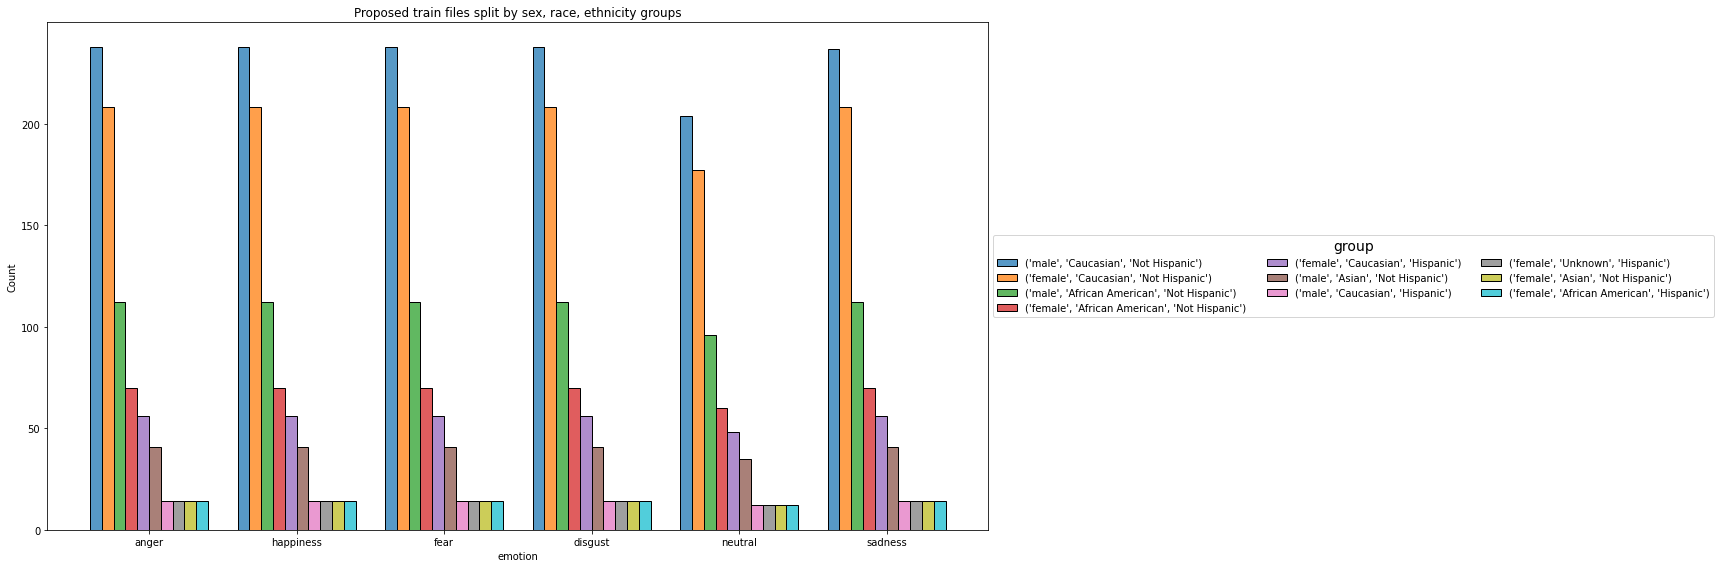

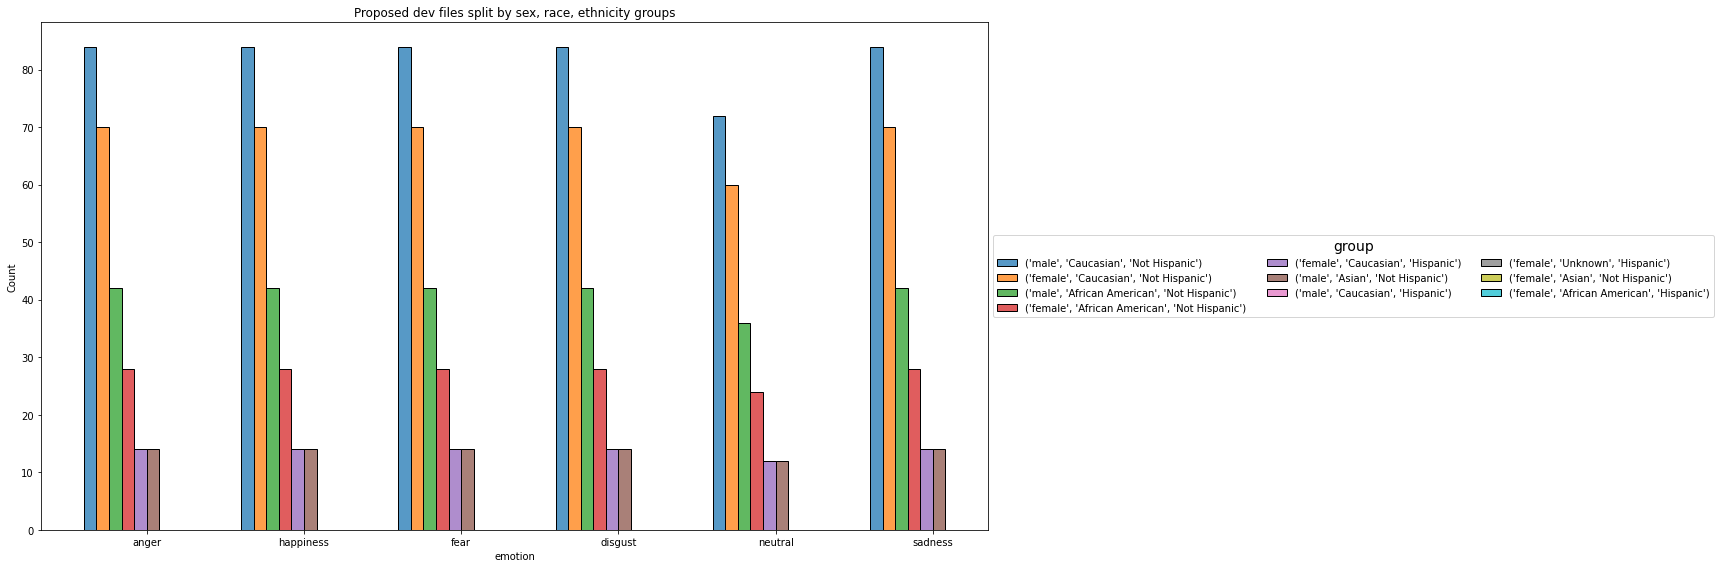

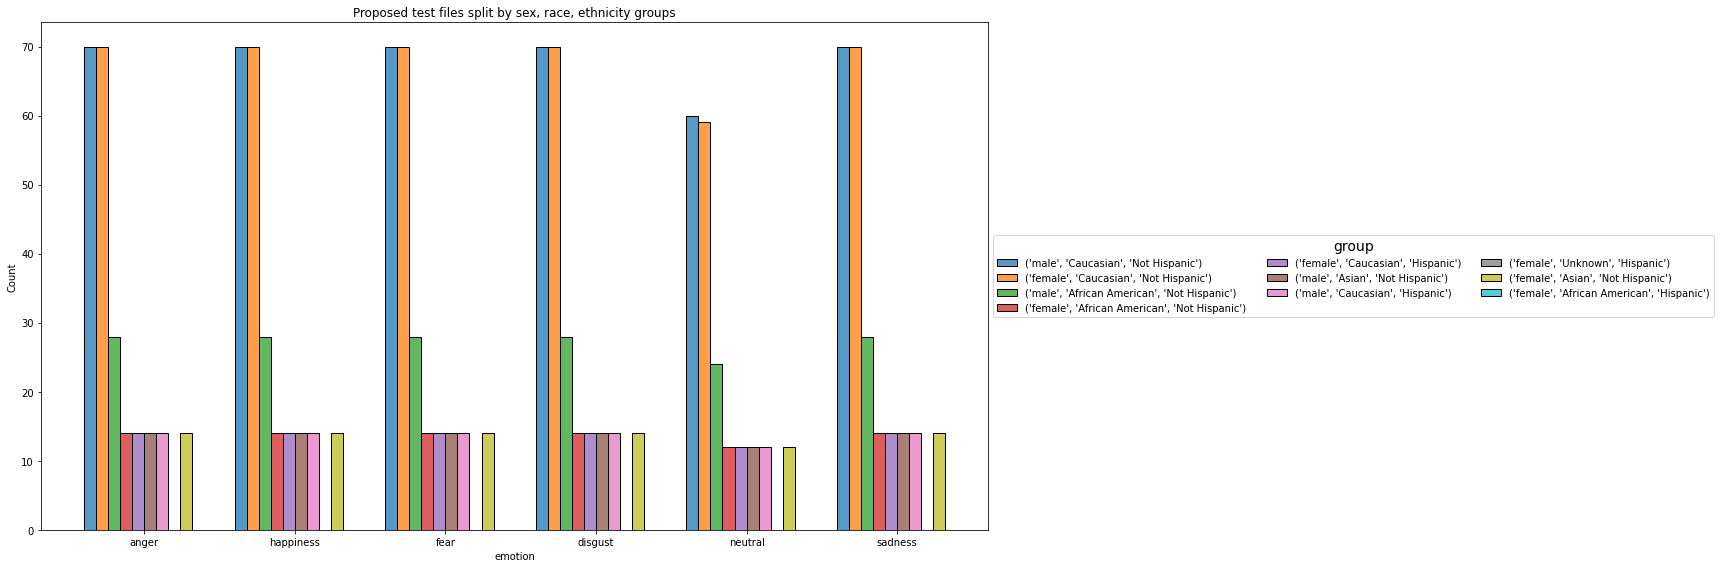

In [5]:
train_df = emotion_df[emotion_df['speaker'].isin(speaker_dist[0])]
dev_df = emotion_df[emotion_df['speaker'].isin(speaker_dist[1])]
test_df = emotion_df[emotion_df['speaker'].isin(speaker_dist[2])]



vis_hist(train_df,x='emotion', hue='group', hue_order=group_order, title='Proposed train files split by sex, race, ethnicity groups')
vis_hist(dev_df, x='emotion', hue='group', hue_order=group_order, title='Proposed dev files split by sex, race, ethnicity groups')
vis_hist(test_df, x='emotion',hue='group', hue_order=group_order, title='Proposed test files split by sex, race, ethnicity groups')

In [6]:
train_speaker_df = speaker_df[speaker_df.index.isin(speaker_dist[0])]
dev_speaker_df = speaker_df[speaker_df.index.isin(speaker_dist[1])]
test_speaker_df = speaker_df[speaker_df.index.isin(speaker_dist[2])]
train_group_counts = train_speaker_df['group'].value_counts()
print('Train speaker group counts: ')
display(train_group_counts)
dev_group_counts = dev_speaker_df['group'].value_counts()
print('Dev speaker group counts: ')
display(dev_group_counts)
test_group_counts = test_speaker_df['group'].value_counts()
print('Test speaker group counts: ')
display(test_group_counts)

Train speaker group counts: 


('male', 'Caucasian', 'Not Hispanic')             17
('female', 'Caucasian', 'Not Hispanic')           15
('male', 'African American', 'Not Hispanic')       8
('female', 'African American', 'Not Hispanic')     5
('female', 'Caucasian', 'Hispanic')                4
('male', 'Asian', 'Not Hispanic')                  3
('male', 'Caucasian', 'Hispanic')                  1
('female', 'Unknown', 'Hispanic')                  1
('female', 'Asian', 'Not Hispanic')                1
('female', 'African American', 'Hispanic')         1
Name: group, dtype: int64

Dev speaker group counts: 


('male', 'Caucasian', 'Not Hispanic')             6
('female', 'Caucasian', 'Not Hispanic')           5
('male', 'African American', 'Not Hispanic')      3
('female', 'African American', 'Not Hispanic')    2
('female', 'Caucasian', 'Hispanic')               1
('male', 'Asian', 'Not Hispanic')                 1
Name: group, dtype: int64

Test speaker group counts: 


('male', 'Caucasian', 'Not Hispanic')             5
('female', 'Caucasian', 'Not Hispanic')           5
('male', 'African American', 'Not Hispanic')      2
('male', 'Caucasian', 'Hispanic')                 1
('female', 'African American', 'Not Hispanic')    1
('female', 'Caucasian', 'Hispanic')               1
('male', 'Asian', 'Not Hispanic')                 1
('female', 'Asian', 'Not Hispanic')               1
Name: group, dtype: int64